In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import csv
import string
import plotly.express as px
import pprint as pp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
import datetime as dt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from operator import itemgetter
import seaborn as sn
import spacy
from matplotlib import pyplot as plt
import plotly.offline as py
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
#nlp = spacy.load('en', disable=['parser', 'ner'])
#import smart_open
#smart_open.open = smart_open.smart_open
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
# libraries for visualization
#import pyLDAvis
#import pyLDAvis.gensim
#sns.countplot 
import warnings
warnings.filterwarnings("ignore")

In [424]:
#nltk.download()
#nltk.download('punkt')
#nltk.download('stopwords')
#!pip install spacy
#!python -m spacy download en
#!python -m spacy download it
#!python -m spacy download fr
#!pip install gensim
#!pip install pyLDAvis
#!pip install --upgrade ipykernel
#!pip install tensorflow

In [447]:
def expand_contractions(text) :
    CONTRACTION_MAP = {"she'll": 'she will', "shouldn't've": 'should not have', "she'll've": 'she will have', "don't": 'do not', "should've": 'should have', "won't": 'will not', "who'll've": 'who will have', "he's": 'he is', "when's": 'when is', "we've": 'we have', "he'd": 'he would', "ma'am": 'madam', "y'all're": 'you all are', "he'd've": 'he would have', "how'd'y": 'how do you', "shan't've": 'shall not have', "haven't": 'have not', "who's": 'who is', "they'd": 'they would', "oughtn't": 'ought not', "I'd": 'I would', "you've": 'you have', "I'm": 'I am', "she'd've": 'she would have', "we'll": 'we will', "mayn't": 'may not', "they've": 'they have', "mustn't've": 'must not have', "could've": 'could have', "what've": 'what have', "mustn't": 'must not', "isn't": 'is not', "that'd've": 'that would have', "i'll": 'i will', "why's": 'why is', "you'd": 'you would', "couldn't've": 'could not have', "they'll've": 'they will have', "we'd": 'we would', "y'all'd": 'you all would', "he'll've": 'he he will have', "shan't": 'shall not', "y'all'd've": 'you all would have', "there'd": 'there would', "needn't": 'need not', "where'd": 'where did', "hadn't've": 'had not have', "wouldn't've": 'would not have', "there's": 'there is', "shouldn't": 'should not', "they'll": 'they will', "needn't've": 'need not have', "mightn't": 'might not', "you're": 'you are', "so've": 'so have', "what'll": 'what will', "mightn't've": 'might not have', "hadn't": 'had not', "aren't": 'are not', "where's": 'where is', "I'll've": 'I will have', "wouldn't": 'would not', "i'd": 'i would', "weren't": 'were not', "would've": 'would have', "i'm": 'i am', "it'll": 'it will', "we'd've": 'we would have', "can't": 'cannot', "y'all": 'you all', "couldn't": 'could not', "how'll": 'how will', "doesn't": 'does not', "when've": 'when have', "how's": 'how is', "I've": 'I have', "it's": 'it is', "y'all've": 'you all have', "how'd": 'how did', "we're": 'we are', "I'd've": 'I would have', "it'd": 'it would', "what're": 'what are', "i've": 'i have', "oughtn't've": 'ought not have', "what's": 'what is', "ain't": 'is not', "who'll": 'who will', "i'd've": 'i would have', "must've": 'must have', "I'll": 'I will', "they're": 'they are', "you'd've": 'you would have', "wasn't": 'was not', "it'll've": 'it will have', "hasn't": 'has not', "won't've": 'will not have', "so's": 'so as', "you'll've": 'you will have', "there'd've": 'there would have', "i'll've": 'i will have', "didn't": 'did not', "where've": 'where have', "they'd've": 'they would have', "why've": 'why have', "it'd've": 'it would have', "who've": 'who have', "sha'n't": 'shall not', "to've": 'to have', "o'clock": 'of the clock', "let's": 'let us', "what'll've": 'what will have', "'cause": 'because', "might've": 'might have', "he'll": 'he will', "that'd": 'that would', "we'll've": 'we will have', "she'd": 'she would', "can't've": 'cannot have', "you'll": 'you will', "will've": 'will have', "she's": 'she is', "that's": 'that is'}
    pattern = re.compile("({})".format("|".join(CONTRACTION_MAP.keys())),flags = re.DOTALL| re.IGNORECASE)
    def replace_text(t):
        txt = t.group(0)
        if txt.lower() in CONTRACTION_MAP.keys():
            return CONTRACTION_MAP[txt.lower()]
        
    expand_text = pattern.sub(replace_text,text)
    return expand_text 
def raiting_plot(df):
    ratings = df['score'].value_counts()
    label_rating = ratings.index
    size_rating = ratings.values
    rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         name = 'Amazon', hole = 0.3)
    last_df = [rating_piechart]
    layout = go.Layout(
           title = 'Distribution of Ratings for Amazon Reviews')
    fig = go.Figure(data = last_df,
                 layout = layout)
    return py.iplot(fig)
#corpus = ["The brown fox wasn't that quick and he couldn't win the race",
          #"Hey that's a great deal! I just bought a phone for $199",
          #"@@You'll (learn) a **lot** in the book. Python is an amazing language!@@"]

#expand_contraction = [expand_contractions(c) for c in corpus]

In [426]:
# Check spellings if you observe some common spelling mistake, you can take into account and change it in the code

In [427]:
reviews= pd.read_csv('reviews_all_3.csv',encoding= 'unicode_escape')

In [428]:
reviews.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'],
      dtype='object')

In [429]:
reviews['appId'].value_counts()

com.amazon.mShop.android.shopping    2000
com.homeretailgroup.argos.android    2000
com.ebay.mobile                      2000
Name: appId, dtype: int64

In [430]:
reviews.loc[(reviews['appId'] == 'com.homeretailgroup.argos.android'), 'Company'] = 'Argos'
reviews.loc[(reviews['appId'] == 'com.ebay.mobile') , 'Company'] = 'Ebay'
reviews.loc[(reviews['appId'] == 'com.amazon.mShop.android.shopping' ), 'Company'] = 'Amazon'

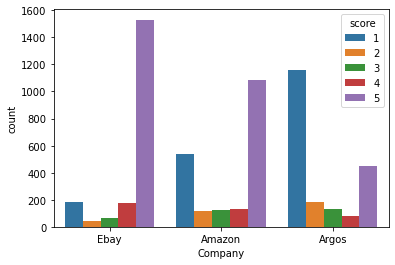

In [431]:
ax = sn.countplot(x="Company", hue="score", data=reviews)

In [432]:
reviews['at'] =  pd.to_datetime(reviews['at'], format='%Y/%m/%d')
reviews['repliedAt'] =  pd.to_datetime(reviews['repliedAt'], format='%Y/%m/%d')

In [433]:
reviews['at'] = [d.date() for d in reviews['at']]
reviews['repliedAt'] = [d.date() for d in reviews['repliedAt']]

In [434]:
# not clear what is replied at and actual time of the comment 
reviews['duration'] = reviews['repliedAt'] - reviews['at']

In [435]:
Replied= reviews[reviews['repliedAt'].notnull()]
#reviews[reviews['repliedAt'].notnull()]

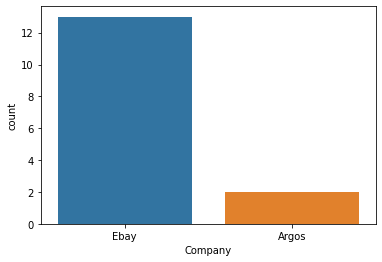

In [436]:
ax = sn.countplot(x="Company", data=Replied)

In [437]:
amazon_reviews=reviews.loc[reviews['appId'] == 'com.amazon.mShop.android.shopping'].reset_index(drop=True)

In [446]:
raiting_plot(amazon_reviews)

In [104]:
# as a company policy, there is no answer to comments 
amazon_reviews['repliedAt'].value_counts()

Series([], Name: repliedAt, dtype: int64)

In [105]:
#set([w.lower() for w in word_tokenize(amazon_reviews['content'][0]) ])

In [106]:
#word_tokenize(amazon_reviews['content'][0])

# Given Clearing Code & N-Gram

In [107]:
total_words=[]
for i in amazon_reviews['content']:
    converted =  expand_contractions(i)
    for y in word_tokenize(converted):
        total_words.append(y)
corpus_tokens = total_words
corpus_tokens = [word.lower() for word in corpus_tokens] 

In [451]:
#fdist=FreqDist(corpus_tokens)
#fdist.plot(30,title='Frequency distribution for 30 most common tokens in our text collection')

In [465]:
# remove stopwords, punctuation and digits. the set( ... ) syntax removes duplicates
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,']
individual_letters = list(string.ascii_lowercase)
some_more_words_to_remove = [ 'rs', 'per', 'would','one','two','first' , "n't" , "'s",
               '000', '00', 'co', 'ditto', '1st', 'ii', 
               'total', 'number', 'year', 'years']
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) 
                   + extra_punctuation_to_remove + individual_letters+some_more_words_to_remove)
filtered_text = [word 
                 for word in corpus_tokens 
                 if not word in remove_these]
#fdist_filtered = FreqDist(filtered_text)
#print(fdist_filtered.most_common(30))
#fdist_filtered.plot(30,title='Frequency distribution (excluding stopwords and punctuation)')

In [538]:
#Before lemmetisation, check most frequently used biagrams and trigrams in whole text inlcuding all reviews 
finder = BigramCollocationFinder.from_words(filtered_text)
word_filter = lambda w1, w2: "app" not in (w1, w2)
finder.apply_ngram_filter(word_filter)
bigram_measures = nltk.collocations.BigramAssocMeasures()
raw_freq_ranking = finder.nbest(bigram_measures.raw_freq, 10) #top-10
raw_freq_ranking 

[('app', 'keeps'),
 ('open', 'app'),
 ('great', 'app'),
 ('app', 'open'),
 ('amazon', 'app'),
 ('love', 'app'),
 ('good', 'app'),
 ('update', 'app'),
 ('use', 'app'),
 ('app', 'app')]

In [526]:
finder = TrigramCollocationFinder.from_words(filtered_text)
word_filter = lambda w1, w2 , w3 : "app" not in (w1, w2, w3)
finder.apply_ngram_filter(word_filter)
bigram_measures = nltk.collocations.BigramAssocMeasures()
raw_freq_ranking = finder.nbest(bigram_measures.raw_freq, 10) #top-10
raw_freq_ranking 

[('app', 'keeps', 'crashing'),
 ('app', 'keeps', 'closing'),
 ('even', 'open', 'app'),
 ('app', 'easy', 'use'),
 ('app', 'love', 'amazon'),
 ('open', 'app', 'keeps'),
 ('app', 'app', 'keeps'),
 ('great', 'app', 'easy'),
 ('love', 'amazon', 'app'),
 ('amazon', 'app', 'keeps')]

## Length & ThumbsUp Analysis 

In [460]:
amazon_reviews['length'] = amazon_reviews['content'].apply(len)
amazon_reviews.groupby('length')['score','thumbsUpCount'].describe().sample(10)
amazon_reviews['length'].value_counts().sort_index()

2       5
3       6
4      51
5      25
6       5
       ..
495     3
497     1
498     2
499     1
500     2
Name: length, Length: 315, dtype: int64

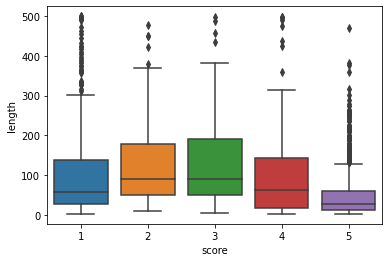

In [688]:
bx = sn.boxplot(x='score', y='length', data=amazon_reviews)

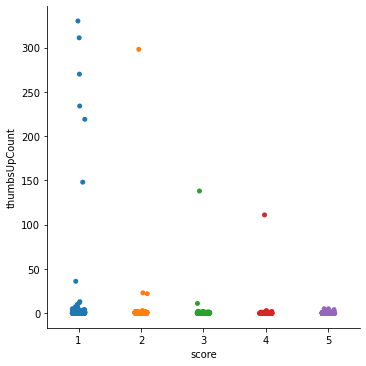

In [461]:
ax = sn.catplot(x='score', y='thumbsUpCount', data=amazon_reviews)
ax

In [462]:
#amazon_reviews[amazon_reviews['length']==499]
#amazon_reviews['content'][1690]
#amazon_reviews.groupby('length')['thumbsUpCount'].describe()

# Topic Search

In [321]:
def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter just noun and adjective because other type of words are not make sense when finding topics
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [6]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sn.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()
def remove_stopwords(rev):
    stop_words = stopwords.words('english')
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new
def df_prepare(df):
    df['reviewText'] = [expand_contractions(r) for r in df['content']] #I'm -> I am transformation and create a new column 
    df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ") #delete number 
    df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2])) #delete words smaller than 3
    return(df)
def freq_preparation(df):
    reviews = [remove_stopwords(r.split()) for r in df['reviewText']]
    reviews = [r.lower() for r in reviews]
    df['clean_text'] = reviews # new column with cleaned and lowered reviews
    nlp = spacy.load("en_core_web_sm")
    tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split()) #tokenisation 
    reviews_2 = lemmatization(tokenized_reviews) # lemmatisation 
    reviews_3 = []
    for i in range(len(reviews_2)):
        reviews_3.append(' '.join(reviews_2[i]))
    df['reviewText'] = reviews_3 # replace review texted with lemmetised version 
    return df, reviews_2 , reviews_3
def LDA_Model(reviews_2):
    dictionary = corpora.Dictionary(reviews_2)
    doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
    LDA = gensim.models.ldamodel.LdaModel
    lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=1000, passes=50)
    return lda_model, doc_term_matrix , dictionary

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each docume
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [574]:
Categorisation= df_prepare(Categorisation)

In [575]:
Categorisation

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,Company,duration,reviewText,clean_text,length
0,gp:AOqpTOGleoFihuJW_rMa8gR4ATpbdJu8ek2KmH9QOQy...,Sonya Chronister,https://play-lh.googleusercontent.com/a-/AOh14...,Don't use,1,0,18.19.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,not use,use,9
1,gp:AOqpTOGOBFah3uXngKmveSQ7kEISkHk1d3REqSXG7MW...,Conchita G,https://play-lh.googleusercontent.com/-eohfX4m...,app works fine just not as fun as it used to b...,2,0,22.6.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,app works fine just not fun used pre pandemic ...,app works fine fun used pre pandemic product r...,158
2,gp:AOqpTOH4znMyHvNK9ZFc4Zd9gIYxCzjt3p_WtpBgr0m...,Nipun,https://play-lh.googleusercontent.com/-FauhG3r...,Poor filters,2,0,22.6.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,Poor filters,poor filters,12
3,gp:AOqpTOFrSq8LLkqbSVzptQUbwqhPsZXebhDy9qxlhBl...,Alyssa Guanlao,https://play-lh.googleusercontent.com/a-/AOh14...,Apparently paying more for Prime doesn't stop ...,2,0,22.6.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,Apparently paying more for Prime does not stop...,apparently paying prime stop placing right pur...,241
4,gp:AOqpTOHV-m6Ezp6R5zGJb2bMQeZeU3vwFoAbeO-gJfN...,J Miller,https://play-lh.googleusercontent.com/a-/AOh14...,I really don't like the new UI. It makes it im...,2,23,16.21.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,really not like the new makes impossible find ...,really like new makes impossible find anything...,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,gp:AOqpTOEHxHb96mJAtGyr5G461j7MNdHbcvlU7yDmHE4...,WAN BAR,https://play-lh.googleusercontent.com/a-/AOh14...,KEEPS CLOSING EVERY TIME I TRY TO OPEN IT work...,1,0,22.6.0.100,2021-03-23,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,KEEPS CLOSING EVERY TIME TRY OPEN worked just ...,keeps closing every time try open worked fine ...,163
654,gp:AOqpTOGfoj5tNxjaMO8isIrsNJxNAzOFm_2iDXuavFz...,Piotr S.,https://play-lh.googleusercontent.com/a-/AOh14...,this was pretty good app. from some time updat...,1,12,22.6.0.100,2021-03-23,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,this was pretty good app from some time update...,pretty good app time updates making worse lot ...,164
655,gp:AOqpTOHiYaIWP7-qjmZ0XIjUgnGD35Ea3kAXVFj5f6m...,Pamela Blackley,https://play-lh.googleusercontent.com/-LXlTgA6...,Will not open. Keep stopping,1,0,22.6.0.100,2021-03-23,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,Will not open Keep stopping,will open keep stopping,28
656,gp:AOqpTOEZqUJUzsoRw2p23WS6JPBMWYgobENNogc1v0E...,Natalie Silver,https://play-lh.googleusercontent.com/a-/AOh14...,New update sucks. I'm going back to desktop only,1,0,NaN,2021-03-23,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,New update sucks going back desktop only,new update sucks going back desktop,48


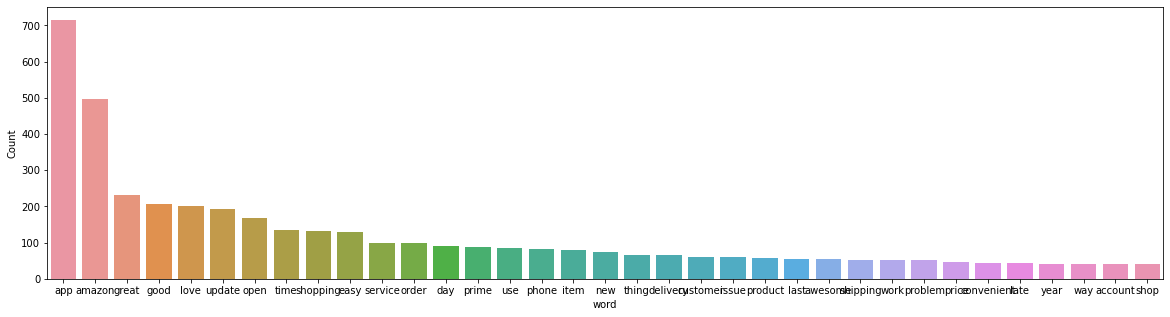

In [449]:
amazon_reviews= df_prepare(amazon_reviews)
amazon_reviews,reviews_2,reviews_3 = freq_preparation(amazon_reviews)
freq_words(amazon_reviews['reviewText'], 35)

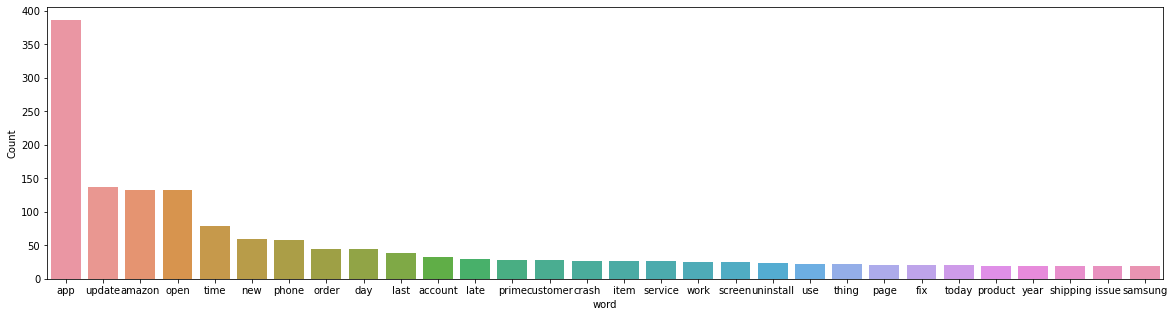

In [559]:
Categorisation = amazon_reviews[amazon_reviews['score'] < 3].reset_index(drop = True)
Categorisation= df_prepare(Categorisation)
Categorisation,reviews_2,reviews_3 = freq_preparation(Categorisation)
freq_words(Categorisation['reviewText'])

In [560]:
lda_model,doc_term_matrix , dictionary =LDA_Model(reviews_2)
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=reviews_2)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.6174,"app, open, phone, time, amazon, uninstall, scr...",[use]
1,1,0.0,0.6702,"amazon, customer, time, app, service, order, p...","[app, fine, fun, pre, pandemic, product, revie..."
2,2,3.0,0.7393,"app, open, phone, time, amazon, uninstall, scr...","[poor, filter]"
3,3,1.0,0.9436,"update, app, open, new, crash, last, late, ama...","[prime, stop, right, purchase, button, purchas..."
4,4,3.0,0.9420,"app, open, phone, time, amazon, uninstall, scr...","[new, impossible, much, space, scroll, lot, th..."
5,5,2.0,0.8906,"amazon, prime, item, time, day, free, shipping...","[order, amazon, prime, day, damn, refund]"
6,6,2.0,0.9230,"amazon, prime, item, time, day, free, shipping...","[locked, account, month, way, contact, amazon,..."
7,7,2.0,0.9150,"amazon, prime, item, time, day, free, shipping...","[stuff, main, page, full, ad, search, term, vpn]"
8,8,3.0,0.7497,"app, open, phone, time, amazon, uninstall, scr...","[logo, hitler]"
9,9,2.0,0.8705,"amazon, prime, item, time, day, free, shipping...","[amazon, amazon, upset, account, amazon]"


## Finding Optimal Number of Topic in the Corpus

In [520]:
def compute_coherence_values(reviews_2, start=2, limit=40, step=3):
    """
    Compute c_v coherence for various number of topics u_mass can also be hired. 
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        dictionary = corpora.Dictionary(reviews_2)
        doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
        LDA = gensim.models.ldamodel.LdaModel
        lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=num_topics, random_state=100,
                chunksize=1000, passes=50)
        model_list.append(lda_model)
        # for coherence 'u_mass' can also be used. 
        coherencemodel = CoherenceModel(model=lda_model, texts=reviews_2, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [521]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(reviews_2, start=2, limit=40, step=6)

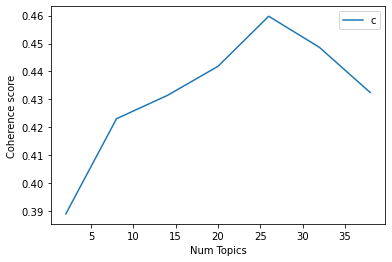

In [522]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [635]:
Categorisation['Topic'] = df_dominant_topic['Dominant_Topic']
Categorisation.groupby('Topic').describe()['score']

,count,mean,std,min,25%,50%,75%,max
Topic,,,,,,,,
0.0,163.0,1.141104,0.349202,1.0,1.0,1.0,1.0,2.0
1.0,166.0,1.192771,0.395668,1.0,1.0,1.0,1.0,2.0
2.0,82.0,1.243902,0.432077,1.0,1.0,1.0,1.0,2.0
3.0,247.0,1.174089,0.379956,1.0,1.0,1.0,1.0,2.0


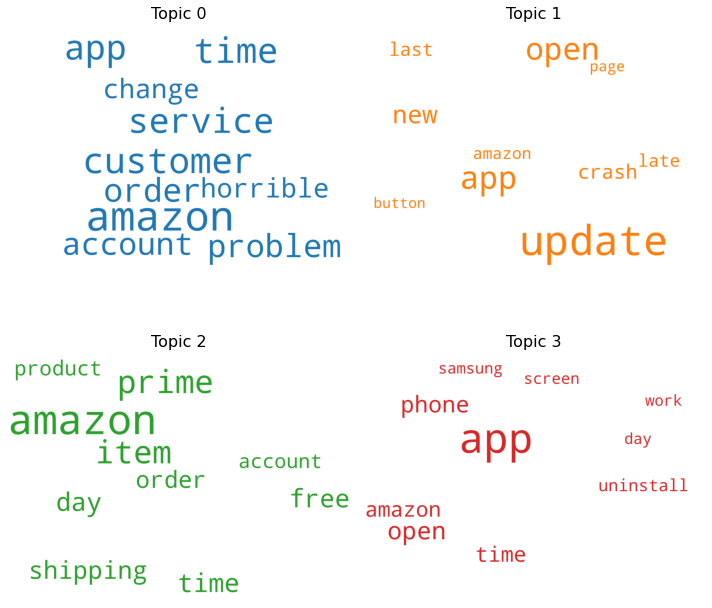

In [633]:
stop_words = stopwords.words('english')
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
#adjust graph with respect to number of topics
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [647]:
corpus = doc_term_matrix
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.01]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 658 samples in 0.000s...
[t-SNE] Computed neighbors for 658 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 658 / 658
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.484028
[t-SNE] KL divergence after 1000 iterations: 0.192770


Loading BokehJS ...

In [352]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.092425  0.126356       1        1  31.480088
3     -0.180394  0.029574       2        1  23.970751
1      0.060849 -0.062695       3        1  22.588425
0      0.027120 -0.093235       4        1  21.960736, topic_info=       Term        Freq       Total Category  logprob  loglift
89   update  105.000000  105.000000  Default  30.0000  30.0000
135    open  101.000000  101.000000  Default  29.0000  29.0000
1       app  268.000000  268.000000  Default  28.0000  28.0000
145   phone   48.000000   48.000000  Default  27.0000  27.0000
26      new   46.000000   46.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
61     year    3.445530   16.059152   Topic4  -5.3538  -0.0233
185    star    3.136991   10.394493   Topic4  -5.4476   0.3179
38   amazon    3.543131   27.768356   Topic4  -5.3259  -0.5430
109    last    3.536451   31.979229   Topic4  -5.3278  -0.6860
79   option    3.235190   15.344108   Topic4  -5.4168  -0.0407

[240 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
136       1  0.676175       able
136       3  0.270470       able
37        1  0.634725    account
37        3  0.074674    account
37        4  0.261357    account
...     ...       ...        ...
61        3  0.124540       year
61        4  0.186809       year
349       1  0.168448  yesterday
349       3  0.252672  yesterday
349       4  0.589569  yesterday

[314 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [562]:
topic_word =[]
for y in range(0,10):
    topic_word.append(lda_model.show_topic(3)[y][0])

In [563]:
topic_word

['app',
 'open',
 'phone',
 'time',
 'amazon',
 'uninstall',
 'screen',
 'samsung',
 'day',
 'work']

In [612]:
all_words=[]
for i in Categorisation['clean_text']:
    for y in word_tokenize(i):
        all_words.append(y)
#all_lower = [word.lower() for word in all_words] 
#all_filtered_text = [word 
#                 for word in all_lower 
#                 if not word in remove_these]

In [614]:
output_biagram=[]
output_tri = []
for i in topic_word:
#Before lemmetisation, check most frequently used biagrams and trigrams in whole text inlcuding all reviews 
    finder = BigramCollocationFinder.from_words(all_words)
    finder_tri = TrigramCollocationFinder.from_words(all_words)
    word_filter = lambda *w: i not in w
    finder.apply_ngram_filter(word_filter)
    finder_tri.apply_ngram_filter(word_filter)
    measures = nltk.collocations.BigramAssocMeasures()
    bi_raw_freq_ranking = finder.nbest(measures.raw_freq, 10) #top-10
    tri_raw_freq_ranking = finder_tri.nbest(measures.raw_freq, 10) #top-10
    output_biagram.append(bi_raw_freq_ranking)
    output_tri.append(tri_raw_freq_ranking)

In [604]:
output_biagram

[[('app', 'keeps'),
  ('open', 'app'),
  ('app', 'open'),
  ('update', 'app'),
  ('amazon', 'app'),
  ('app', 'working'),
  ('get', 'app'),
  ('app', 'app'),
  ('app', 'crashing'),
  ('crashing', 'app')],
 [('open', 'app'),
  ('app', 'open'),
  ('even', 'open'),
  ('try', 'open'),
  ('crashing', 'open'),
  ('wont', 'open'),
  ('cant', 'open'),
  ('open', 'keeps'),
  ('update', 'open'),
  ('open', 'amazon')],
 [('new', 'phone'),
  ('app', 'phone'),
  ('open', 'phone'),
  ('android', 'phone'),
  ('phone', 'new'),
  ('restarted', 'phone'),
  ('change', 'phone'),
  ('everything', 'phone'),
  ('phone', 'anymore'),
  ('phone', 'app')],
 [('every', 'time'),
  ('time', 'try'),
  ('time', 'open'),
  ('app', 'time'),
  ('last', 'time'),
  ('time', 'since'),
  ('amazon', 'time'),
  ('single', 'time'),
  ('time', 'app'),
  ('time', 'time')],
 [('amazon', 'app'),
  ('amazon', 'prime'),
  ('amazon', 'shopping'),
  ('love', 'amazon'),
  ('using', 'amazon'),
  ('get', 'amazon'),
  ('open', 'amazon'),


In [615]:
output_biagram

[[('app', 'keeps'),
  ('open', 'app'),
  ('app', 'open'),
  ('the', 'app'),
  ('amazon', 'app'),
  ('update', 'app'),
  ('this', 'app'),
  ('get', 'app'),
  ('app', 'crashing'),
  ('app', 'working')],
 [('open', 'app'),
  ('app', 'open'),
  ('even', 'open'),
  ('not', 'open'),
  ('try', 'open'),
  ('open', 'keeps'),
  ('wont', 'open'),
  ('cant', 'open'),
  ('open', 'amazon'),
  ('open', 'can')],
 [('new', 'phone'),
  ('app', 'phone'),
  ('open', 'phone'),
  ('android', 'phone'),
  ('phone', 'number'),
  ('restarted', 'phone'),
  ('change', 'phone'),
  ('everything', 'phone'),
  ('phone', 'anymore'),
  ('phone', 'app')],
 [('every', 'time'),
  ('time', 'try'),
  ('time', 'open'),
  ('last', 'time'),
  ('time', 'app'),
  ('time', 'since'),
  ('amazon', 'time'),
  ('app', 'time'),
  ('most', 'time'),
  ('one', 'time')],
 [('amazon', 'app'),
  ('amazon', 'prime'),
  ('amazon', 'shopping'),
  ('love', 'amazon'),
  ('open', 'amazon'),
  ('using', 'amazon'),
  ('get', 'amazon'),
  ('used', '

In [605]:
output_tri

[[('app', 'keeps', 'crashing'),
  ('app', 'keeps', 'closing'),
  ('even', 'open', 'app'),
  ('open', 'app', 'keeps'),
  ('keeps', 'crashing', 'app'),
  ('update', 'app', 'keeps'),
  ('app', 'keeps', 'force'),
  ('open', 'app', 'anymore'),
  ('try', 'open', 'app'),
  ('update', 'app', 'open')],
 [('even', 'open', 'app'),
  ('open', 'app', 'keeps'),
  ('update', 'even', 'open'),
  ('cant', 'even', 'open'),
  ('keeps', 'crashing', 'open'),
  ('open', 'app', 'anymore'),
  ('try', 'open', 'app'),
  ('update', 'app', 'open'),
  ('app', 'open', 'tried'),
  ('app', 'wont', 'open')],
 [('even', 'open', 'phone'),
  ('even', 'restarted', 'phone'),
  ('open', 'app', 'phone'),
  ('open', 'phone', 'anymore'),
  ('amazon', 'app', 'phone'),
  ('android', 'phone', 'deleting'),
  ('android', 'phone', 'fire'),
  ('android', 'phone', 'give'),
  ('anymore', 'restarted', 'phone'),
  ('app', 'android', 'phone')],
 [('every', 'time', 'try'),
  ('crashes', 'every', 'time'),
  ('every', 'time', 'open'),
  ('cra

In [616]:
output_tri

[[('app', 'keeps', 'crashing'),
  ('app', 'keeps', 'closing'),
  ('open', 'app', 'keeps'),
  ('even', 'open', 'app'),
  ('not', 'open', 'app'),
  ('the', 'app', 'keeps'),
  ('keeps', 'crashing', 'app'),
  ('the', 'app', 'open'),
  ('update', 'app', 'open'),
  ('app', 'can', 'not')],
 [('can', 'not', 'open'),
  ('open', 'app', 'keeps'),
  ('even', 'open', 'app'),
  ('not', 'even', 'open'),
  ('not', 'open', 'app'),
  ('the', 'app', 'open'),
  ('update', 'app', 'open'),
  ('cant', 'even', 'open'),
  ('open', 'app', 'anymore'),
  ('open', 'can', 'not')],
 [('even', 'open', 'phone'),
  ('even', 'restarted', 'phone'),
  ('open', 'app', 'phone'),
  ('open', 'phone', 'anymore'),
  ('phone', 'the', 'new'),
  ('amazon', 'app', 'phone'),
  ('android', 'phone', 'deleting'),
  ('android', 'phone', 'fire'),
  ('android', 'phone', 'why'),
  ('anymore', 'restarted', 'phone')],
 [('every', 'time', 'try'),
  ('crashes', 'every', 'time'),
  ('every', 'time', 'open'),
  ('crashing', 'every', 'time'),
  (

# LSTM 

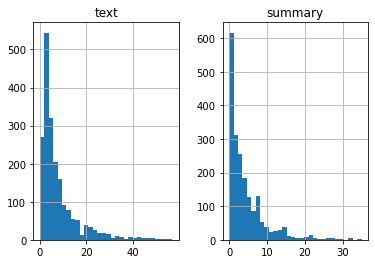

In [617]:
# Amazon Reviews for every amazon_review dataframe 
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in amazon_reviews['clean_text']:
      text_word_count.append(len(i.split()))

for i in amazon_reviews['reviewText']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [247]:
max_len_text=40 
max_len_summary=20

In [248]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(amazon_reviews['clean_text'],amazon_reviews['reviewText'],test_size=0.1,random_state=0,shuffle=True) 

In [260]:
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K 

In [256]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [267]:
K.ones_like(x_voc_size)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [258]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [259]:
y_voc_size

1413

In [276]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

In [279]:
model = Sequential()
no_dim = 500
max_features = 2000
model.add(Embedding(max_features, no_dim))
model.add(LSTM(no_dim, dropout=0.2, recurrent_dropout=0.2))

NotImplementedError: Cannot convert a symbolic Tensor (lstm_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [303]:
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(K.ones_like(encoder_inputs)) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [304]:
np.version.version

'1.20.1'

In [266]:
K.ones_like(y_tr)

<tf.Tensor: shape=(1800, 20), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])>

# Sentiment Analysis 

In [693]:
def classifySentenceVADER(sen):
    sid = SIA()
    # Loop the sentences
    ss = sid.polarity_scores(sen) 
    return (ss['pos'], ss['neg'], ss['compound'])

In [694]:
sen1 = amazon_reviews['content'][0]
pos, neg, comp = classifySentenceVADER(sen1)
print("Sen 1: is pos: "+str(pos)+" neg: "+str(neg), " overall: ", str(comp))

Sen 1: is pos: 0.512 neg: 0.0  overall:  0.6369


In [695]:
amazon_reviews['content'][0]

'The best way to shop'

In [696]:
amazon_reviews['content'][1]

"1-2 day prime shipping shown when ordering but once ordered it gradually gets delayed longer and longer. What happened to Amazon's shipping? And don't say Covid because they are using private shipping companies. Ap is great. Shipping is not."

In [697]:
sen2 = amazon_reviews['content'][1]
pos, neg, comp = classifySentenceVADER(sen2)
print("Sen 2: is pos: "+str(pos)+" neg: "+str(neg), " overall: ", str(comp))

Sen 2: is pos: 0.126 neg: 0.052  overall:  0.6486


In [698]:
def classifySentence(sen):
    wn_lem = WordNetLemmatizer()
    pos = 0
    neg = 0
    for token in nltk.word_tokenize(sen):
        lemma = wn_lem.lemmatize(token)
        #print(lemma)
        if len(wn.synsets(lemma))>0:
            synset = wn.synsets(lemma)[0]
            sent = swn.senti_synset(synset.name())
            #print("Sentiment of "+token+" "+str(sent))
            pos = pos + sent.pos_score()
            neg = neg + sent.neg_score()
    return (pos, neg)

In [699]:
posit =[]
negat = []
vader_pos = []
vader_neg = []
vader_over = []
for index ,value  in amazon_reviews['content'].iteritems():
    sentence = expand_contractions(value)    
    pos1, neg1 = classifySentence(sentence)
    pos_vader, neg_vader, comp_vader = classifySentenceVADER(sentence)
    posit.append(pos1)
    negat.append(neg1)
    vader_pos.append(pos_vader)
    vader_neg.append(neg_vader)
    vader_over.append(comp_vader)
amazon_reviews['nltk_pos'] = posit
amazon_reviews['nltk_neg'] = negat
amazon_reviews['vader_pos'] = vader_pos
amazon_reviews['vader_neg'] = vader_neg
amazon_reviews['vader_over'] = vader_over

In [700]:
amazon_reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,...,reviewText,clean_text,length,Category,processed_sentences,nltk_pos,nltk_neg,vader_pos,vader_neg,vader_over
0,gp:AOqpTOF6ZOpPnZW_BrTMzYPcXGzx_bZcDx-RYiSqcLS...,Brad Hein,https://play-lh.googleusercontent.com/-DcAgv1i...,The best way to shop,5,0,22.6.0.100,2021-03-25,NaN,NaT,...,good way shop,the best way shop,20,Excellent,The best way to shop,0.250,0.000,0.512,0.000,0.6369
1,gp:AOqpTOGoQJ_DDr7hm7OLgpEQ7vPbWYU-ffiZetT2KXV...,wrayner11,https://play-lh.googleusercontent.com/-rIgagxs...,1-2 day prime shipping shown when ordering but...,5,0,22.6.0.100,2021-03-25,NaN,NaT,...,day prime shipping ordering amazon shipping co...,day prime shipping shown ordering ordered grad...,241,Excellent,1-2 day prime shipping shown when ordering but...,1.250,1.625,0.123,0.051,0.6486
2,gp:AOqpTOFtp6X3IjwAs4A4Ix8dRzt-v2M0Rrx_kEMCVO0...,Johnny Grice,https://play-lh.googleusercontent.com/-JtfNfMz...,can't beat getting what you need the next day,5,0,22.6.0.100,2021-03-25,NaN,NaT,...,need next day,cannot beat getting need next day,45,Excellent,cannot beat getting what you need the next day,0.125,0.750,0.000,0.000,0.0000
3,gp:AOqpTOGl4yk9nybRpeSdaBE4rc5lip3pcm3N1UfU9RO...,Raider LH,https://play-lh.googleusercontent.com/a-/AOh14...,foh,4,0,22.6.0.100,2021-03-25,NaN,NaT,...,,foh,3,Average,foh,0.000,0.000,0.000,0.000,0.0000
4,gp:AOqpTOGleoFihuJW_rMa8gR4ATpbdJu8ek2KmH9QOQy...,Sonya Chronister,https://play-lh.googleusercontent.com/a-/AOh14...,Don't use,1,0,18.19.0.100,2021-03-25,NaN,NaT,...,use,use,9,Low,do not use,0.000,0.625,0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,gp:AOqpTOEHxHb96mJAtGyr5G461j7MNdHbcvlU7yDmHE4...,WAN BAR,https://play-lh.googleusercontent.com/a-/AOh14...,KEEPS CLOSING EVERY TIME I TRY TO OPEN IT work...,1,0,22.6.0.100,2021-03-23,NaN,NaT,...,time last night good app sure,keeps closing every time try open worked fine ...,163,Low,KEEPS CLOSING EVERY TIME I TRY TO OPEN IT work...,1.875,1.250,0.207,0.000,0.7425
1996,gp:AOqpTOGfoj5tNxjaMO8isIrsNJxNAzOFm_2iDXuavFz...,Piotr S.,https://play-lh.googleusercontent.com/a-/AOh14...,this was pretty good app. from some time updat...,1,12,22.6.0.100,2021-03-23,NaN,NaT,...,good app time bad lot information last version...,pretty good app time updates making worse lot ...,164,Low,this was pretty good app. from some time updat...,1.875,1.125,0.178,0.091,0.4588
1997,gp:AOqpTOHiYaIWP7-qjmZ0XIjUgnGD35Ea3kAXVFj5f6m...,Pamela Blackley,https://play-lh.googleusercontent.com/-LXlTgA6...,Will not open. Keep stopping,1,0,22.6.0.100,2021-03-23,NaN,NaT,...,,will open keep stopping,28,Low,Will not open. Keep stopping,0.125,0.625,0.265,0.000,0.1139
1998,gp:AOqpTOEZqUJUzsoRw2p23WS6JPBMWYgobENNogc1v0E...,Natalie Silver,https://play-lh.googleusercontent.com/a-/AOh14...,New update sucks. I'm going back to desktop only,1,0,NaN,2021-03-23,NaN,NaT,...,new update suck desktop,new update sucks going back desktop,48,Low,New update sucks. i am going back to desktop only,0.375,0.000,0.000,0.238,-0.3612


In [701]:
amazon_reviews['content'][949]

'Amazon is the best site for buying just bout anything I love it and get prime'

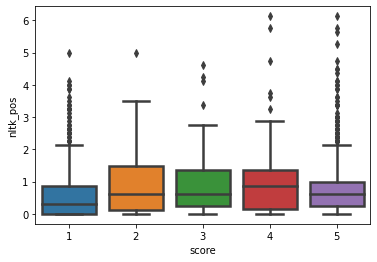

In [703]:
ax = sn.boxplot(x="score", y="nltk_pos", 
                 data=amazon_reviews, linewidth=2.5)

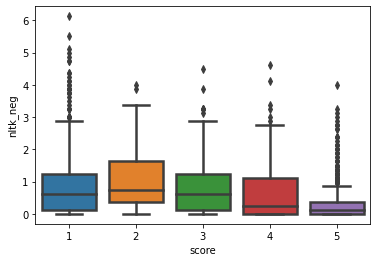

In [704]:
ax = sn.boxplot(x="score", y="nltk_neg", 
                 data=amazon_reviews, linewidth=2.5)

In [296]:
amazon_reviews.groupby('score')['vader_pos','vader_neg' ].describe()

vader_pos                                                          \
          count      mean       std  min    25%     50%      75%    max   
score                                                                     
1         540.0  0.056202  0.094989  0.0  0.000  0.0000  0.09325  0.600   
2         118.0  0.069678  0.100703  0.0  0.000  0.0000  0.13075  0.458   
3         127.0  0.132039  0.202387  0.0  0.000  0.0700  0.17900  1.000   
4         130.0  0.297177  0.328789  0.0  0.000  0.1565  0.47950  1.000   
5        1085.0  0.491622  0.314763  0.0  0.259  0.4870  0.74900  1.000   

      vader_neg                                                       
          count      mean       std  min  25%    50%      75%    max  
score                                                                 
1         540.0  0.101520  0.174667  0.0  0.0  0.000  0.13625  1.000  
2         118.0  0.077661  0.125370  0.0  0.0  0.000  0.12625  0.756  
3         127.0  0.081740  0.118727  0.0  0.0  0.031  0.12300  0.654  
4         130.0  0.044315  0.108417  0.0  0.0  0.000  0.03925  0.636  
5        1085.0  0.017186  0.063607  0.0  0.0  0.000  0.00000  0.620

# Trying TF -IDF 

In [ ]:
import os
import csv

#os.chdir('/Users/rweiss/Dropbox/presentations/IRiSS2013/text1/fileformats/')

with open('amazon/sociology_2010.csv', 'rb') as csvfile:
    amazon_reader = csv.DictReader(csvfile, delimiter=',')
    amazon_reviews = [row['review_text'] for row in amazon_reader]

# Document Similarity

In [661]:


mydoclist = ['Julie loves me more than Linda loves me',
'Jane likes me more than Julie loves me',
'He likes basketball more than baseball']

tfidf_vectorizer = TfidfVectorizer(min_df = 1)
tfidf_matrix = tfidf_vectorizer.fit_transform(mydoclist)

document_distances = (tfidf_matrix * tfidf_matrix.T)
print('Created a ' + str(document_distances.get_shape()[0]) + ' by ' + str(document_distances.get_shape()[1]) + ' document-document cosine distance matrix.')
print(document_distances.toarray())

Created a 3 by 3 document-document cosine distance matrix.
[[1.         0.75360253 0.12840803]
 [0.75360253 1.         0.2574232 ]
 [0.12840803 0.2574232  1.        ]]


In [50]:
list_of_comments=amazon_reviews['content'].to_list()

In [51]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1)
tfidf_matrix = tfidf_vectorizer.fit_transform(list_of_comments)

document_distances = (tfidf_matrix * tfidf_matrix.T)
print('Created a ' + str(document_distances.get_shape()[0]) + ' by ' + str(document_distances.get_shape()[1]) + ' document-document cosine distance matrix.')
print(document_distances.toarray())

Created a 950 by 950 document-document cosine distance matrix.
[[1.         0.01124588 0.         ... 0.         0.02357604 0.        ]
 [0.01124588 1.         0.         ... 0.06034301 0.06128059 0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.06034301 0.         ... 1.         0.         0.        ]
 [0.02357604 0.06128059 0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [73]:
from sklearn.metrics.pairwise import linear_kernel

#code taken from here: http://stackoverflow.com/a/12128777
from sklearn.metrics.pairwise import linear_kernel 

#linear kernel is the same as cosine distance when using tfidf + euclidean normalized vectors (L2 Norm=1))
#this is the benefit of sticking to scikits-learn from beginning to end of an analysis

cosine_similarities = linear_kernel(tfidf_matrix[643:644], tfidf_matrix).flatten() # let's look at similarity to the very first document
related_docs_indices = cosine_similarities.argsort()[:-len(list_of_comments)-1:-1] #what is the order of most to least similar?
print(cosine_similarities[related_docs_indices])# what are the cosine distances?

[1.         1.         0.64765327 0.64765327 0.64765327 0.64765327
 0.64765327 0.64765327 0.64765327 0.64765327 0.64765327 0.64765327
 0.64765327 0.64765327 0.64765327 0.64765327 0.64765327 0.64765327
 0.64765327 0.64765327 0.64765327 0.64765327 0.64765327 0.64765327
 0.53517434 0.53517434 0.51738752 0.51738752 0.51738752 0.51738752
 0.43667641 0.43133335 0.43133335 0.43133335 0.43133335 0.43133335
 0.43133335 0.43133335 0.43133335 0.43133335 0.42360871 0.40013199
 0.38767236 0.36940255 0.35836991 0.32632665 0.32437544 0.30716549
 0.29887602 0.28730929 0.28477756 0.28119535 0.27348028 0.26982975
 0.26756701 0.26347324 0.26196051 0.25156975 0.24067809 0.23206733
 0.22925352 0.22700896 0.22628554 0.22199579 0.21220383 0.21010271
 0.20814751 0.20799871 0.20195698 0.20128266 0.20105727 0.19212971
 0.1890963  0.17719583 0.1737392  0.17260744 0.16177644 0.16165471
 0.1597617  0.15728632 0.15708472 0.15606078 0.15605515 0.15589534
 0.15304713 0.14659013 0.14575666 0.13880399 0.13850673 0.1355

In [56]:
idx = max(range(len(cosine_similarities[related_docs_indices])), key = lambda i: cosine_similarities[related_docs_indices][i])

related_docs_indices

In [80]:
list_of_comments[479]

'Good'

# Classifying Reviews

In [4]:
reviews= pd.read_csv('reviews_all_classification.csv',encoding= 'unicode_escape')

In [5]:
reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOE-98AA8HG28htMFHAcOEI5mlZIwsRYVMtFB3P...,tim brennan,https://play-lh.googleusercontent.com/a-/AOh14...,Crashes constantly. Wasn't a great app to begi...,1,0,NaN,2021-04-01 11:44:18,NaN,NaN,newest,com.ebay.mobile
1,gp:AOqpTOHV9WNHaQwwd4TXr02iv0elNQDvYwngUfyxDXx...,Ju C,https://play-lh.googleusercontent.com/a-/AOh14...,No customer service. After years of using eBay...,1,0,6.12.1.8,2021-04-01 11:41:45,NaN,NaN,newest,com.ebay.mobile
2,gp:AOqpTOGxcrZXXPWMxg9VutLD0OsGx_D-ZmKxMfxdNmG...,Ian Holcombe,https://play-lh.googleusercontent.com/-ZqGkwjo...,Currently have a seller that requested the shi...,1,0,6.13.0.8,2021-04-01 11:40:21,NaN,NaN,newest,com.ebay.mobile
3,gp:AOqpTOFVICkK1hPco5zx3Xp7pycwVDBQR8V0uXh-Lpr...,Ema Tinai,https://play-lh.googleusercontent.com/-sNTpcil...,Expensive,1,0,6.13.0.8,2021-04-01 10:06:38,NaN,NaN,newest,com.ebay.mobile
4,gp:AOqpTOEd3kjq5px5yhQd8oLyUpicRI5MY9QfJJVSBlY...,Alex Betts,https://play-lh.googleusercontent.com/-Y3Qf7hO...,Vague ajd wkkiysh,1,0,NaN,2021-04-01 09:42:45,NaN,NaN,newest,com.ebay.mobile
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,gp:AOqpTOGihF2OeVt8JC9eoqHdXXf2717bo5FlncGvJXH...,Andy Stan,https://play-lh.googleusercontent.com/-VYu9vRg...,Great,5,0,NaN,2019-11-16 17:13:27,NaN,NaN,newest,com.homeretailgroup.argos.android
7496,gp:AOqpTOEauOoY0eZo9M1Ie2iPpcFzQkUXcMXNl4W97mr...,John Cassidy,https://play-lh.googleusercontent.com/a-/AOh14...,Great app,5,0,4.24.1,2019-11-16 11:26:11,NaN,NaN,newest,com.homeretailgroup.argos.android
7497,gp:AOqpTOEC8h7tyWvgVvcbnA-oLuCIizwzEmcHHVt27sp...,HELEN,https://play-lh.googleusercontent.com/-pqoAJI7...,I was not able to reserve a item that Id wante...,5,9,4.25,2019-11-16 10:10:50,NaN,NaN,newest,com.homeretailgroup.argos.android
7498,gp:AOqpTOFl85wH4UafegIW3ddjrAPwuBnfVjJ436miGva...,Ant Jam,https://play-lh.googleusercontent.com/-KYPzbcc...,"Bring the store home with you, then take it on...",5,0,4.25,2019-11-16 09:26:58,NaN,NaN,newest,com.homeretailgroup.argos.android


In [651]:
amazon_reviews.loc[(amazon_reviews['score'] >= 0) & (amazon_reviews['score'] < 3), 'Category'] = 'Low'
amazon_reviews.loc[(amazon_reviews['score'] >= 3) & (amazon_reviews['score'] < 5), 'Category'] = 'Average'
amazon_reviews.loc[(amazon_reviews['score'] >= 5) & (amazon_reviews['score'] < 6), 'Category'] = 'Excellent'

In [652]:
amazon_reviews

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,Company,duration,reviewText,clean_text,length,Category
0,gp:AOqpTOF6ZOpPnZW_BrTMzYPcXGzx_bZcDx-RYiSqcLS...,Brad Hein,https://play-lh.googleusercontent.com/-DcAgv1i...,The best way to shop,5,0,22.6.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,good way shop,the best way shop,20,Excellent
1,gp:AOqpTOGoQJ_DDr7hm7OLgpEQ7vPbWYU-ffiZetT2KXV...,wrayner11,https://play-lh.googleusercontent.com/-rIgagxs...,1-2 day prime shipping shown when ordering but...,5,0,22.6.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,day prime shipping ordering amazon shipping co...,day prime shipping shown ordering ordered grad...,241,Excellent
2,gp:AOqpTOFtp6X3IjwAs4A4Ix8dRzt-v2M0Rrx_kEMCVO0...,Johnny Grice,https://play-lh.googleusercontent.com/-JtfNfMz...,can't beat getting what you need the next day,5,0,22.6.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,need next day,cannot beat getting need next day,45,Excellent
3,gp:AOqpTOGl4yk9nybRpeSdaBE4rc5lip3pcm3N1UfU9RO...,Raider LH,https://play-lh.googleusercontent.com/a-/AOh14...,foh,4,0,22.6.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,,foh,3,Average
4,gp:AOqpTOGleoFihuJW_rMa8gR4ATpbdJu8ek2KmH9QOQy...,Sonya Chronister,https://play-lh.googleusercontent.com/a-/AOh14...,Don't use,1,0,18.19.0.100,2021-03-25,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,use,use,9,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,gp:AOqpTOEHxHb96mJAtGyr5G461j7MNdHbcvlU7yDmHE4...,WAN BAR,https://play-lh.googleusercontent.com/a-/AOh14...,KEEPS CLOSING EVERY TIME I TRY TO OPEN IT work...,1,0,22.6.0.100,2021-03-23,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,time last night good app sure,keeps closing every time try open worked fine ...,163,Low
1996,gp:AOqpTOGfoj5tNxjaMO8isIrsNJxNAzOFm_2iDXuavFz...,Piotr S.,https://play-lh.googleusercontent.com/a-/AOh14...,this was pretty good app. from some time updat...,1,12,22.6.0.100,2021-03-23,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,good app time bad lot information last version...,pretty good app time updates making worse lot ...,164,Low
1997,gp:AOqpTOHiYaIWP7-qjmZ0XIjUgnGD35Ea3kAXVFj5f6m...,Pamela Blackley,https://play-lh.googleusercontent.com/-LXlTgA6...,Will not open. Keep stopping,1,0,22.6.0.100,2021-03-23,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,,will open keep stopping,28,Low
1998,gp:AOqpTOEZqUJUzsoRw2p23WS6JPBMWYgobENNogc1v0E...,Natalie Silver,https://play-lh.googleusercontent.com/a-/AOh14...,New update sucks. I'm going back to desktop only,1,0,NaN,2021-03-23,NaN,NaT,newest,com.amazon.mShop.android.shopping,Amazon,NaT,new update suck desktop,new update sucks going back desktop,48,Low


In [654]:
Target = ['Low','Average','Excellent']
target_labels = ['Excellent','Average','Low']

In [655]:
dict ={}
for i in Target: 
    dict[i] = amazon_reviews[amazon_reviews['Category']== i]['clean_text'].to_list()

In [656]:
dict

{'Low': ['use',
  'app works fine fun used pre pandemic product reviews always reviews thousands probably garbage',
  'poor filters',
  'apparently paying prime stop placing right purchase button accidentally clicked instead purchase idea safe ads fine apps placement rude',
  'really like new makes impossible find anything wasting much space scroll forever see anything lot things missing really awkward navigate the old design perfect far better mess least constantly scroll see two things',
  'order something amazon prime gets damaged gotta wait days get damn refund back',
  'locked account month way contact amazon login brings documentation denied page',
  'used stuff related shopping main page full ads first hits rarely ever match search terms work vpn',
  'the logo reminds hitler much please delete',
  'used use amazon great cannot even get amazon anymore upset cannot login account amazon',
  'the search button cannot used type items small two year old granddaughter cannot even touch

In [657]:
y_o = pd.DataFrame(amazon_reviews['Category'])
x_o = amazon_reviews['clean_text'].reset_index(drop=True)

In [658]:
np.random.seed(3)
x_train, x_test, y_train, y_test = tts(x_o, y_o, test_size=0.2, random_state=42)
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [659]:
y_test

,Category
1860,Excellent
353,Excellent
1333,Low
905,Excellent
1289,Average
...,...
965,Low
1284,Low
1739,Excellent
261,Excellent


In [662]:
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1, 1), stop_words='english', strip_accents='unicode', norm='l2')
                             
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [663]:
classifier = MultinomialNB().fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

In [664]:
print('The precision for this classifier is ' + str(metrics.precision_score(y_test, y_predicted,average='micro')))
print('The recall for this classifier is ' + str(metrics.recall_score(y_test, y_predicted,average='micro')))
print('The f1 for this classifier is ' + str(metrics.f1_score(y_test, y_predicted,average='micro')))
print('\nHere is the confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predicted))

#What are the top N most predictive features per class?
N = 10
vocabulary = np.array([t for t, i in sorted(vectorizer.vocabulary_.items(), key=itemgetter(1))])

for i, label in enumerate(target_labels):
    topN = np.argsort(classifier.coef_[i])[-N:]
    print("\nThe top %d most informative features for %s: \n%s" % (N, label, " ".join(vocabulary[topN])))

The precision for this classifier is 0.83
The recall for this classifier is 0.83
The f1 for this classifier is 0.83

Here is the confusion matrix:
[[  0  22  22]
 [  0 217   7]
 [  0  17 115]]

The top 10 most informative features for Excellent: 
working crashing use amazon great keeps open update app good

The top 10 most informative features for Average: 
fast awesome use shopping app easy good great amazon love

The top 10 most informative features for Low: 
crashes phone new amazon working update crashing keeps open app


In [665]:
processed_sentences = []
for index ,value  in amazon_reviews['content'].iteritems():
    sentence = expand_contractions(value)
    processed_sentences.append(sentence)
amazon_reviews['processed_sentences'] = processed_sentences

In [666]:
y_o = pd.DataFrame(amazon_reviews['Category'])
x_o = amazon_reviews['processed_sentences'].reset_index(drop=True)
np.random.seed(3)
x_train, x_test, y_train, y_test = tts(x_o, y_o, test_size=0.2, random_state=42)
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1, 1), stop_words='english', strip_accents='unicode', norm='l2')
                             
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)
classifier = MultinomialNB().fit(X_train, y_train)
y_predicted = classifier.predict(X_test)
print('The precision for this classifier is ' + str(metrics.precision_score(y_test, y_predicted,average='micro')))
print('The recall for this classifier is ' + str(metrics.recall_score(y_test, y_predicted,average='micro')))
print('The f1 for this classifier is ' + str(metrics.f1_score(y_test, y_predicted,average='micro')))
print('\nHere is the confusion matrix:')
print(metrics.confusion_matrix(y_test, y_predicted))

#What are the top N most predictive features per class?
N = 10
vocabulary = np.array([t for t, i in sorted(vectorizer.vocabulary_.items(), key=itemgetter(1))])

for i, label in enumerate(target_labels):
    topN = np.argsort(classifier.coef_[i])[-N:]
    print("\nThe top %d most informative features for %s: \n%s" % (N, label, " ".join(vocabulary[topN])))

The precision for this classifier is 0.83
The recall for this classifier is 0.83
The f1 for this classifier is 0.83

Here is the confusion matrix:
[[  0  23  21]
 [  0 217   7]
 [  0  17 115]]

The top 10 most informative features for Excellent: 
crashing use just amazon great keeps open update app good

The top 10 most informative features for Average: 
fast awesome use shopping app easy good great amazon love

The top 10 most informative features for Low: 
phone just new amazon working update crashing keeps open app


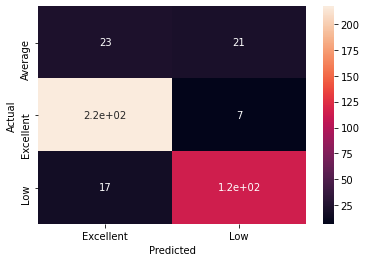

In [667]:
prediction_rfe_df=pd.DataFrame(y_predicted)
y_test.reset_index(drop=True, inplace= True)
conf_rfe_df = pd.concat([y_test['Category'],prediction_rfe_df[0]],axis =1)
confusion_matrix_rfe= pd.crosstab(conf_rfe_df['Category'],conf_rfe_df[0], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix_rfe, annot=True)
plt.show()

In [670]:
tfidf=TfidfVectorizer(max_df=0.9,min_df=10) #actually, we already discard the stop words in preprocessing

train_1=tfidf.fit_transform(x_train)
test_1=tfidf.transform(x_test)


print("No. of features extracted")
print(len(tfidf.get_feature_names()))
print(tfidf.get_feature_names()[:20])

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
309
['10', '21', 'able', 'about', 'access', 'account', 'after', 'again', 'ago', 'all', 'almost', 'also', 'always', 'am', 'amazing', 'amazon', 'an', 'and', 'android', 'annoying']


In [674]:
from sklearn.metrics import  confusion_matrix,classification_report
nb=MultinomialNB()
nb.fit(train_arr,y_train)
test_pred=nb.predict(test_arr)


from sklearn.metrics import accuracy_score,confusion_matrix
print("\nAccuracy of TF-IDF and Multinomial NB is:",accuracy_score(y_test, test_pred))

print(classification_report(y_test, test_pred))


Accuracy of TF-IDF and Multinomial NB is: 0.8325
              precision    recall  f1-score   support

     Average       1.00      0.02      0.04        44
   Excellent       0.88      0.94      0.91       224
         Low       0.77      0.92      0.83       132

    accuracy                           0.83       400
   macro avg       0.88      0.63      0.60       400
weighted avg       0.85      0.83      0.79       400



<Figure size 432x288 with 0 Axes>

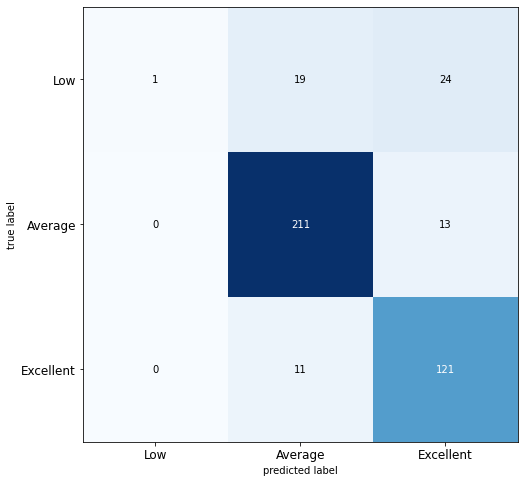

In [677]:
cm  = confusion_matrix(y_test, test_pred)
labels = ['Low', 'Average', 'Excellent']
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), labels, fontsize=12)
plt.yticks(range(3), labels, fontsize=12)
plt.show()

In [679]:
vocabulary 

array(['03', '10', '100', ..., 'zwei', 'ø1', 'øaø'], dtype='<U19')

In [681]:
def vocab_control(word):
    if word in word2vec.vocab.keys():
        print("{} exists in the vocabulary".format(word))
    else:
        print("{} does not exist in the vocabulary and it is the example for OOV problem".format(word))

In [680]:
from gensim.models import KeyedVectors

EMBEDDING_FILE = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz" # from above
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [682]:
from nltk.tokenize import WordPunctTokenizer
WPT = WordPunctTokenizer()

def news_embed(sentence):
    sentence=sentence.lower()
    tokens=WPT.tokenize(sentence)
    new_tokens=[token for token in tokens]

    sent_list=[]
    for word in new_tokens:
        if word in word2vec.vocab.keys():
            wv=word2vec[word]
            sent_list.append(wv)
        else:
            continue
    if len(sent_list)<1:
        dummy=np.random.normal(0.5, 0.5, 300)
        sent_list.append(dummy)
    sent_embed= np.mean(sent_list,axis=0)
    return sent_embed

In [683]:
train_array=np.array([news_embed(news) for news in x_train])
test_array=np.array([news_embed(news) for news in x_test])

In [684]:
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
model = LinearSVC(random_state=0)
model.fit(train_array, y_train)

LinearSVC(random_state=0)

In [686]:
test_pred=model.predict(test_array)

from sklearn.metrics import accuracy_score,confusion_matrix
print("\nAccuracy of W2V and LinearSVC over test set is:",accuracy_score(y_test, test_pred))

print(classification_report(y_test, test_pred))


Accuracy of W2V and LinearSVC over test set is: 0.82
              precision    recall  f1-score   support

     Average       0.25      0.05      0.08        44
   Excellent       0.89      0.91      0.90       224
         Low       0.75      0.93      0.83       132

    accuracy                           0.82       400
   macro avg       0.63      0.63      0.60       400
weighted avg       0.77      0.82      0.79       400



<Figure size 432x288 with 0 Axes>

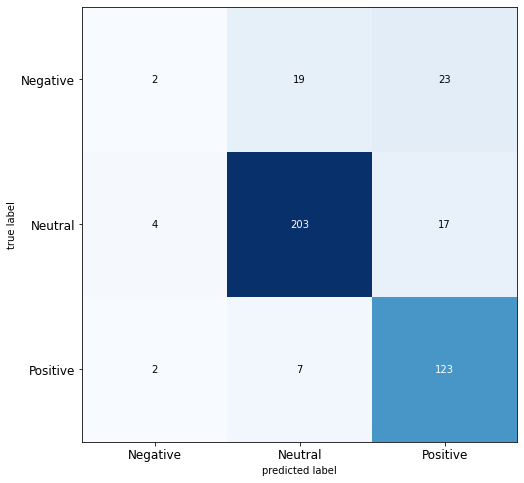

In [687]:
cm  = confusion_matrix(y_test, test_pred)
labels = ['Negative', 'Neutral', 'Positive']
from mlxtend.plotting import plot_confusion_matrix
plt.figure()
plot_confusion_matrix(cm, figsize=(8,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), labels, fontsize=12)
plt.yticks(range(3), labels, fontsize=12)
plt.show()

In [668]:
doc = nlp(amazon_reviews['content'][0])
olist = []
for token in doc:
    olist.append([token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children]])
odf = pd.DataFrame(olist)
odf.columns = ["Text", "Dep", "Head text", "Head POS", "Children"]
odf

,Text,Dep,Head text,Head POS,Children
0,The,det,way,NOUN,[]
1,best,amod,way,NOUN,[]
2,way,ROOT,way,NOUN,"[The, best, shop]"
3,to,aux,shop,VERB,[]
4,shop,relcl,way,NOUN,[to]


In [ ]:
#Finding most commang unigrams
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))